In [1]:
import PseudoNetCDF as pnc
import cartopy.crs as ccrs
from cartopy import config
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib import ticker, cm, colors

In [2]:
## import csvs of calculated oh reactivities
csv_dir = '../Data for project/'
oh_reac_list = list()
for file in os.listdir(csv_dir):
    oh_reac_list.append(pd.read_csv(csv_dir+file))
    
df_all = pd.concat(oh_reac_list)
## split df into high and low
df = df_all
df_highalt = df.iloc[np.where(df['altitude']>1000)]
df_lowalt = df.iloc[np.where(df['altitude']<1000)]

species_names = df.columns[4:-6]

## Postage stamp plot

OH reactivity total, Altitude, CO reactivity (or concentration?), non-VOC reactivity 

actually just do voc and non voc side by side

NameError: name 'figure' is not defined

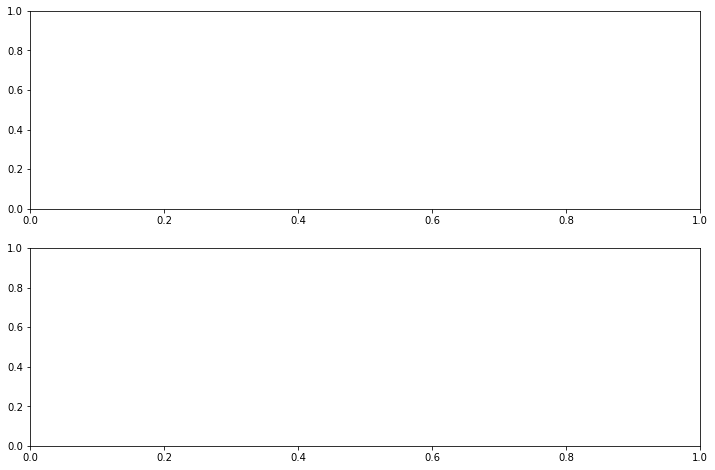

In [3]:
df = df_all
fig, ax = plt.subplots(2,1,figsize=(12,8))

#ax = figure.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax = figure.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=-30))
#ax = figure.add_subplot(1,1,1, projection=ccrs.Mollweide(central_longitude=-150, globe=None, false_easting=None, false_northing=None))
ax.coastlines()
#ax.set_extent([140, -180, -80, 80])
z = df['non_voc_react']
im = ax.scatter(30+df['longitude'],df['latitude'], c=z,
                cmap='plasma', norm=colors.LogNorm())#(vmin=10**(-4), vmax=10**(-1)))
plt.title('ATom-2 Flight', fontsize=14)
ax.colorbar(im, ax=ax, shrink = 0.5, label='Non-VOC Reactivity with OH', extend='both')
plt.savefig("fig_nonvoc.png")

## 1:1 voc:total OH reactivity plot

make nice w labels

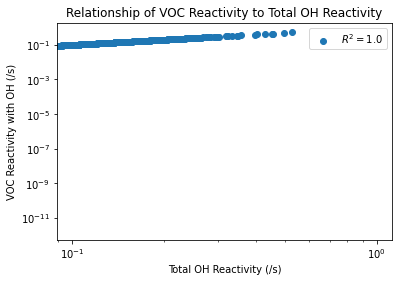

In [67]:
##quantify VOC agreement with total OH reactivity -- for boundary layer, high tropo, low stratosphere
import statsmodels.api as sm

df = df_all
y = df['voc_react']
x1 = df['total_react']

# regression
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
### it comes out to essentially 1:1 with slope = 1

#plot details
plt.scatter(y,x1,label = ("$R^2=1.0$"))

#yhat = 0.0017*x1 + 0.275
 
#fig = plt.plot(x1,yhat, lw=4, c=’orange’, label = ‘regression line’)

plt.xlabel("Total OH Reactivity (/s)")
plt.ylabel("VOC Reactivity with OH (/s)")
plt.title("Relationship of VOC Reactivity to Total OH Reactivity")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./plts2/reactivityvreactivity_log.png')
plt.show()

## Scatter plot: species reactivity vs altitude

Show for latitude bands.  Or air masses?  Prob. too complicated.

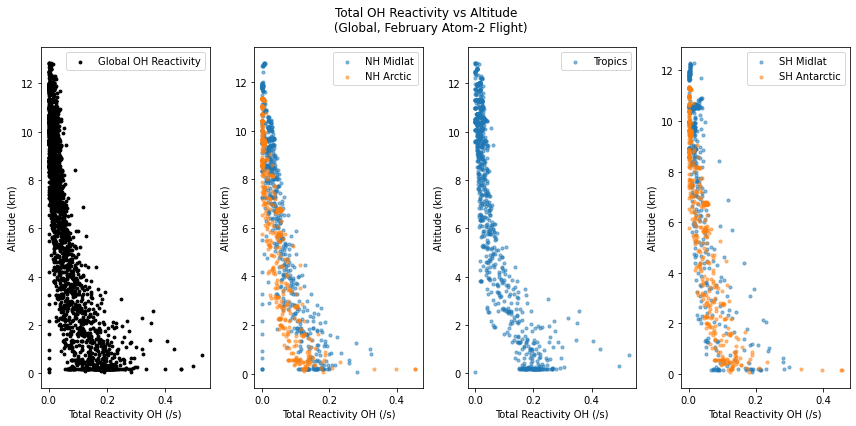

In [119]:
df = df_all
fig, ax = plt.subplots(1,4,figsize=(12,6))
#plt.scatter(df['total_react'],df['total_react'])

s = 8

ax[0].scatter(df['total_react'], df['altitude']/1000, label="Global OH Reactivity", s=s, color='k')
# for latitude groups:
s = 10
lat = df['latitude']
## NH Midlat (30-60)
tempdf = df.iloc[np.where(np.logical_and(lat>=30., lat<=60.))]
ax[1].scatter(tempdf['total_react'],tempdf['altitude']/1000, label="NH Midlat",s=s, alpha=0.5)
## NH pole (60+)
tempdf = df.iloc[np.where(lat>60.)]
ax[1].scatter(tempdf['total_react'],tempdf['altitude']/1000, label="NH Arctic",s=s, alpha=0.5)
## tropical
tempdf = df.iloc[np.where(np.logical_and(lat<=30., lat>=-30.))]
ax[2].scatter(tempdf['total_react'],tempdf['altitude']/1000, label="Tropics",s=s, alpha=0.5)
## SH Midlat
tempdf = df.iloc[np.where(np.logical_and(lat<=-30., lat>=-60.))]
ax[3].scatter(tempdf['total_react'],tempdf['altitude']/1000, label="SH Midlat",s=s, alpha=0.5)
## SH pole
tempdf = df.iloc[np.where(lat>60.)]
ax[3].scatter(tempdf['total_react'],tempdf['altitude']/1000, label="SH Antarctic",s=s, alpha=0.5)


plt.suptitle("Total OH Reactivity vs Altitude \n (Global, February Atom-2 Flight)",size=12)
for a in ax:
    a.legend()
    a.set_xlabel("Total Reactivity OH (/s)")
    a.set_ylabel("Altitude (km)")
    #a.set_xscale('log')
    #a.set_xlim((10**-3,1.0))
#plt.legend(title='Species Name', bbox_to_anchor=(1.2, 1),loc='upper right')
fig.tight_layout()
plt.savefig("./plts2/reactivity_vsaltitude.png")
plt.show()

## Box-whiskers plot

just a few species?

In [108]:
##box-plots: species reactvitity fraction range per species
# 1 panel free tropo; 1 panel MBL
df = df_all
data = list()
sel_species = list()
for species in species_names:
    tempy = (df[species]/df['total_react'])
    if tempy.iloc[np.where(df['total_react'] > 0.01)].max() > 0.1:
        #plt.boxplot(tempy)
        tempy = tempy[~np.isnan(tempy)]
        data.append(np.asarray(tempy))
        sel_species.append(species)

#plt.yscale('log')
#sel_species = sel_species[0:2] # just for now
#data = data[0:2]

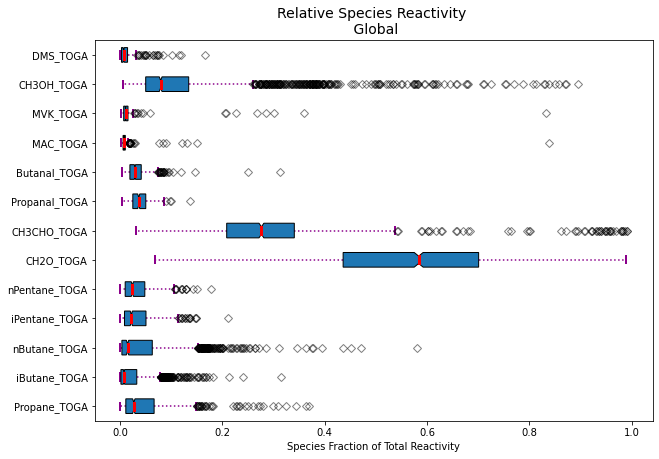

In [109]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  
#for patch, color in zip(bp['boxes'], colors): 
#    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":")   
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
    
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3)   
    
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
# x-axis labels 
ax.set_yticklabels(sel_species) 
plt.xlabel("Species Fraction of Total Reactivity")
  
# Adding title  
plt.title("Relative Species Reactivity \n Global",size=14)
#Marine Boundary Layer (<1km altitude)", size=14) 
  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
      

# save plot
plt.savefig("./plts2/globalboxplot.png")
# show plot 
plt.show(bp) 
plt.show()

In [111]:
df['altitude'].min()

40.9222222222222